In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
from ln_utils import *

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [4]:
graph_files = []

In [5]:
data_dir = "../LNdata/lncaptures/lngraph/2019/"
graph_files +=  [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f]
MIN_TIME = 1549065601-86400 #Saturday, February 2, 2019 12:00:01 AM
#MAX_TIME = 1552867201 #Monday, March 18, 2019 12:00:01 AM

In [6]:
data_dir = "../LNdata/"
#graph_files = [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f]
graph_files += [data_dir + f for f in sorted(os.listdir(data_dir)) if ".json" in f][5:]
#MIN_TIME = 1552478399 # Wednesday, March 13, 2019 11:59:59 AM
MAX_TIME = 1553947199 # Saturday, March 30, 2019 11:59:59 AM

graph_files = graph_files[:15]
#graph_files

# Calculate ranks of connected nodes

In [7]:
attachments, node_list, scores_list, ranks_list = observe_node_attachements_over_time(graph_files[:-1])

# TODO: export calculated centralities etc. + popularities!!!

# Analyse ranks of connected nodes

In [8]:
attachments[0].head()

In [9]:
att = attachments[0]

In [10]:
def bin_rank(rank):
    if rank < 10:
        return 1
    elif rank < 100:
        return 2
    else:
        return 3

In [11]:
att["betw_rank_bin"] = att["betw_rank"].apply(bin_rank)

In [12]:
att["betw_rank"].hist(bins=50)

In [13]:
att["betw_rank_bin"].hist(bins=50)

In [14]:
for att in attachments:
    print(att.mean())

### Weekly correlations of popular authority nodes

In [15]:
pop_df = get_attachement_popularity(attachments)

In [16]:
sns.heatmap(corr_mx(pop_df, "spearman"), annot=True)

In [17]:
sns.heatmap(corr_mx(pop_df, "wkendall"), annot=True)

In [18]:
sns.heatmap(corr_mx(pop_df, "kendall"), annot=True)

In [23]:
sp = pop_corr_with_centralities(pop_df, scores_list, method="spearman")
ke = pop_corr_with_centralities(pop_df, scores_list, method="kendall")
wk = pop_corr_with_centralities(pop_df, scores_list, method="wkendall")

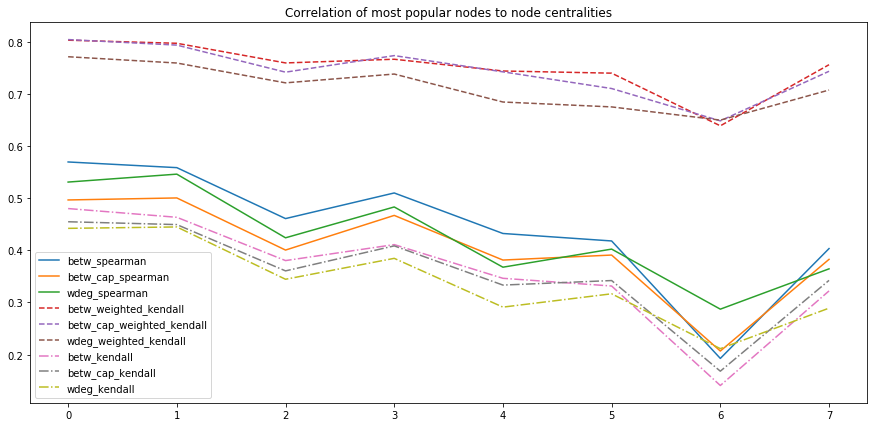

In [27]:
plt.figure(figsize=(15,7))
plt.title("Correlation of most popular nodes to node centralities")
x = range(pop_df.shape[1])
plt.plot(x, sp["betw"],label="betw_spearman")
plt.plot(x, sp["betw_cap"],label="betw_cap_spearman")
plt.plot(x, sp["wdeg"],label="wdeg_spearman")
plt.plot(x, wk["betw"],"--",label="betw_weighted_kendall")
plt.plot(x, wk["betw_cap"],"--",label="betw_cap_weighted_kendall")
plt.plot(x, wk["wdeg"],"--",label="wdeg_weighted_kendall")
plt.plot(x, ke["betw"],"-.",label="betw_kendall")
plt.plot(x, ke["betw_cap"],"-.",label="betw_cap_kendall")
plt.plot(x, ke["wdeg"],"-.",label="wdeg_kendall")
plt.legend()
plt.show()

### Most popular authority nodes:

In [37]:
most_pop = pop_df.rank(ascending=False).mean(axis=1).sort_values()[:50]

In [38]:
pop_df.head()

,0,1,2,3,4,5,6,7
0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c,225.0,255.0,185.0,246.0,175.0,180.0,168.0,107.0
0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266,175.0,144.0,129.0,174.0,121.0,130.0,150.0,90.0
03e5ea100e6b1ef3959f79627cb575606b19071235c48b3e7f9808ebcd6d12e87d,93.0,12.0,7.0,21.0,34.0,87.0,169.0,7.0
03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f,70.0,138.0,150.0,170.0,145.0,67.0,123.0,84.0
0232e20e7b68b9b673fb25f48322b151a93186bffe4550045040673797ceca43cf,60.0,34.0,37.0,139.0,83.0,88.0,95.0,22.0


In [39]:
most_pop

0331f80652fb840239df8dc99205792bba2e559a05469915804c08420230e23c7c      1.7500
0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266      4.0000
03864ef025fde8fb587d989186ce6a4a186895ee44a926bfc370e2c366597a3f8f      7.5000
03c2abfa93eacec04721c019644584424aab2ba4dff3ac9bdab4e9c97007491dda     12.8125
0232e20e7b68b9b673fb25f48322b151a93186bffe4550045040673797ceca43cf     13.1875
02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f0c544b34c1c6f3b9a02b     13.4375
03bb88ccc444534da7b5b64b4f7b15e1eccb18e102db0e400d4b9cfe93763aa26d     14.5000
0279c22ed7a068d10dc1a38ae66d2d6461e269226c60258c021b1ddcdfe4b00bc4     18.1875
0390b5d4492dc2f5318e5233ab2cebf6d48914881a33ef6a9c6bcdbb433ad986d0     18.9375
03c436af41160a355fc1ed230a64f6a64bcbd2ae50f12171d1318f9782602be601     19.8125
0242a4ae0c5bef18048fbecf995094b74bfb0f7391418d71ed394784373f41e4f3     25.7500
02529db69fd2ebd3126fb66fafa234fc3544477a23d509fe93ed229bb0e92e4fb8     26.0000
03fb822818be083e0a954db85257a2911a3d55458b8c1ea4124b

### Betweeness ranks of most popular nodes on weeks 1-5-8:

#### Huge gain in betweeness: 

- 27 - 7 - 8 (4th)
- 41 - 32 - 33 (14th)
- 46 - 35 - 28 (16th)
- 40 - 33 - 21 (22th)
- 96 - 6 - 7 (23th)
- 156 - 48 - 43 (37th)

etc.

In [42]:
for idx, node in enumerate(most_pop.index):
    print(idx+1,"# %i - %i - %i" % (ranks_list[0]["betw"].get(node, None), ranks_list[4]["betw"].get(node, None), ranks_list[-1]["betw"].get(node, None), ))

1 # 2 - 2 - 1
2 # 5 - 4 - 4
3 # 3 - 3 - 5
4 # 27 - 7 - 8
5 # 18 - 15 - 17
6 # 1 - 1 - 2
7 # 9 - 12 - 15
8 # 4 - 5 - 6
9 # 12 - 13 - 12
10 # 49 - 55 - 57
11 # 24 - 22 - 24
12 # 6 - 8 - 9
13 # 22 - 20 - 16
14 # 41 - 32 - 33
15 # 23 - 27 - 44
16 # 46 - 35 - 28
17 # 15 - 19 - 23
18 # 30 - 31 - 30
19 # 20 - 28 - 41
20 # 31 - 29 - 26
21 # 11 - 14 - 13
22 # 40 - 33 - 21
23 # 96 - 6 - 7
24 # 55 - 37 - 36
25 # 36 - 26 - 19
26 # 26 - 24 - 29
27 # 32 - 23 - 27
28 # 19 - 30 - 50
29 # 10 - 10 - 11
30 # 8 - 9 - 10
31 # 16 - 21 - 34
32 # 57 - 38 - 38
33 # 42 - 36 - 37
34 # 58 - 43 - 51
35 # 61 - 52 - 52
36 # 127 - 85 - 70
37 # 156 - 48 - 43
38 # 29 - 25 - 25
39 # 17 - 18 - 20
40 # 82 - 78 - 69
41 # 13 - 17 - 22
42 # 85 - 88 - 78
43 # 37 - 45 - 31
44 # 50 - 40 - 45
45 # 53 - 44 - 46
46 # 68 - 41 - 100
47 # 21 - 46 - 56
48 # 39 - 53 - 68
49 # 63 - 69 - 61
50 # 38 - 39 - 32
